In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [223]:
df =pd.read_csv("C:\\Datasets\\LawSuits\\database.csv")
df.columns
df.isnull().sum()
df.dropna()

,case_id,docket_id,issues_id,vote_id,date_decision,decision_type,us_citation,court_citation,led_citation,lexis_citation,...,authority_decision_two,law_type,law_supplement,law_minor_supplement,majority_opinion_writer,majority_opinion_assigner,split_vote,majority_votes,minority_votes,Unnamed: 53


In [224]:
df.isnull().sum()
df.drop(['Unnamed: 53'],axis=1,inplace=True)

In [225]:
df.info

<bound method DataFrame.info of        case_id    docket_id       issues_id            vote_id date_decision  \
0     1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01    11/18/1946   
1     1946-002  1946-002-01  1946-002-01-01  1946-002-01-01-01    11/18/1946   
2     1946-003  1946-003-01  1946-003-01-01  1946-003-01-01-01    11/18/1946   
3     1946-004  1946-004-01  1946-004-01-01  1946-004-01-01-01    11/25/1946   
4     1946-005  1946-005-01  1946-005-01-01  1946-005-01-01-01    11/25/1946   
...        ...          ...             ...                ...           ...   
8732  2015-075  2015-075-01  2015-075-01-01  2015-075-01-01-01     6/27/2016   
8733  2015-076  2015-076-01  2015-076-01-01  2015-076-01-01-01      6/9/2016   
8734  2015-077  2015-077-01  2015-077-01-01  2015-077-01-01-01     5/31/2016   
8735  2015-078  2015-078-01  2015-078-01-01  2015-078-01-01-01     5/31/2016   
8736  2015-079  2015-079-01  2015-079-01-01  2015-079-01-01-01     5/16/2016   

      d

In [226]:
df['date_decision'] = pd.to_datetime(df.date_decision)

In [227]:
df['date_decision'].tail()

8732   2016-06-27
8733   2016-06-09
8734   2016-05-31
8735   2016-05-31
8736   2016-05-16
Name: date_decision, dtype: datetime64[ns]

In [228]:
def unique_values(column,df=df):
    """For each column this function returns unique value counts"""
    print(df[column].nunique())

In [229]:
for column in df.columns:
    unique_values(column=df.columns)

case_id                            8737
docket_id                          8737
issues_id                          8737
vote_id                            8737
date_decision                      2426
decision_type                         6
us_citation                        8356
court_citation                     8609
led_citation                       8654
lexis_citation                     8736
term                                 70
court                                32
chief_justice                         5
docket                             6308
case_name                          8501
date_argument                      3049
date_reargument                     138
petitioner                          261
petitioner_state                     57
respondent                          242
respondent_state                     55
jurisdiction                         12
administrative_action               111
administrative_action_state          52
district_court                        2


In [230]:
def most_common(column,df=df):
    """This value returns the 10 most frequent items in our columns in our dataset"""
    return(df[column].value_counts().head(10))

<AxesSubplot:xlabel='chief_justice', ylabel='Count'>

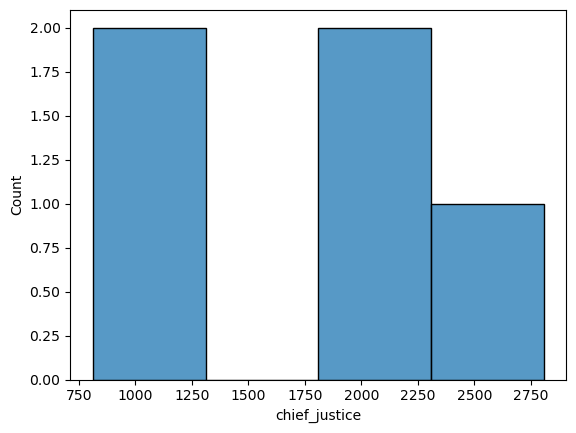

In [231]:
sns.histplot(most_common('chief_justice'))

In [232]:
df.columns

Index(['case_id', 'docket_id', 'issues_id', 'vote_id', 'date_decision',
       'decision_type', 'us_citation', 'court_citation', 'led_citation',
       'lexis_citation', 'term', 'court', 'chief_justice', 'docket',
       'case_name', 'date_argument', 'date_reargument', 'petitioner',
       'petitioner_state', 'respondent', 'respondent_state', 'jurisdiction',
       'administrative_action', 'administrative_action_state',
       'district_court', 'case_origin', 'case_origin_state', 'case_source',
       'case_source_state', 'lower_court_disagreement', 'cert_reason',
       'lower_court_disposition', 'lower_disposition_direction',
       'declaration_unconstitutionality', 'case_disposition',
       'disposition_unusual', 'party_winning', 'precedent_alteration',
       'vote_unclear', 'issue', 'issue_area', 'decision_direction',
       'decision_direction_dissent', 'authority_decision_one',
       'authority_decision_two', 'law_type', 'law_supplement',
       'law_minor_supplement', 'major

In [233]:
correlation= df.corr()
correlation


,decision_type,term,court,petitioner,petitioner_state,respondent,respondent_state,jurisdiction,administrative_action,administrative_action_state,...,decision_direction,decision_direction_dissent,authority_decision_one,authority_decision_two,law_type,law_supplement,majority_opinion_assigner,split_vote,majority_votes,minority_votes
decision_type,1.000000,-0.097781,-0.079467,-0.005985,0.002413,-0.037972,-0.025023,0.102693,0.040282,-0.017167,...,-0.013382,-0.004032,-0.041395,-0.008779,-0.003227,-0.007845,-0.073614,-0.007708,-0.059637,0.029936
term,-0.097781,1.000000,0.969123,-0.120049,-0.104704,0.004273,0.014902,-0.061788,-0.057340,-0.039701,...,-0.097921,-0.024812,-0.013752,0.110462,0.071696,0.056643,0.873622,0.021667,0.076303,-0.010135
court,-0.079467,0.969123,1.000000,-0.117142,-0.093423,-0.001763,0.013295,-0.056212,-0.039313,-0.045224,...,-0.095264,-0.020182,-0.018197,0.094373,0.064781,0.050400,0.881347,0.022479,0.064500,-0.006847
petitioner,-0.005985,-0.120049,-0.117142,1.000000,-0.115287,0.068981,0.035547,-0.128679,-0.201993,0.040671,...,0.066356,0.003337,0.081659,0.029071,0.037525,0.063607,-0.093133,0.011388,0.020971,-0.040404
petitioner_state,0.002413,-0.104704,-0.093423,-0.115287,1.000000,0.030141,0.590313,-0.005328,-0.193262,0.994570,...,0.021791,0.068762,0.036082,-0.033777,0.075354,0.060429,-0.076284,0.144853,-0.030157,0.013958
respondent,-0.037972,0.004273,-0.001763,0.068981,0.030141,1.000000,-0.071900,-0.125122,-0.211157,0.025070,...,-0.047434,-0.013993,0.114216,0.013218,0.095480,0.122706,0.045313,0.003444,-0.003666,-0.014476
respondent_state,-0.025023,0.014902,0.013295,0.035547,0.590313,-0.071900,1.000000,-0.006053,-0.184836,0.986680,...,-0.047146,0.009633,0.059962,-0.163132,0.057834,0.059206,0.010834,-0.002679,-0.042519,0.047457
jurisdiction,0.102693,-0.061788,-0.056212,-0.128679,-0.005328,-0.125122,-0.006053,1.000000,0.080069,0.003282,...,0.196555,0.099135,-0.037933,-0.056011,-0.009675,-0.017099,-0.047461,0.183608,0.024086,-0.052395
administrative_action,0.040282,-0.057340,-0.039313,-0.201993,-0.193262,-0.211157,-0.184836,0.080069,1.000000,NaN,...,0.004830,-0.041644,-0.191907,-0.051904,-0.240568,-0.259904,-0.041942,-0.054228,-0.000947,0.009195
administrative_action_state,-0.017167,-0.039701,-0.045224,0.040671,0.994570,0.025070,0.986680,0.003282,NaN,1.000000,...,-0.080877,0.028158,-0.018443,0.041552,0.012116,0.019255,-0.002238,NaN,-0.049529,0.052504


Text(0.5, 1.0, 'How Variables are correlated in our datasets')

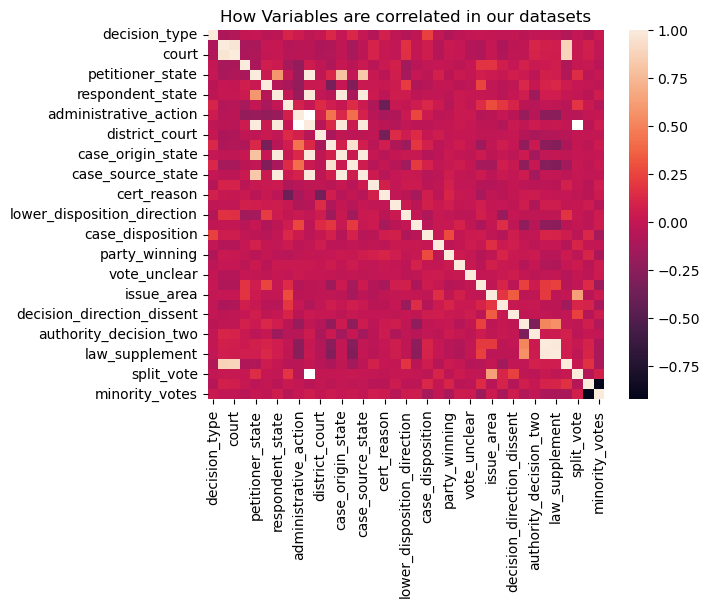

In [234]:
sns.heatmap(correlation)
plt.title('How Variables are correlated in our datasets')

In [235]:
 df.head()

,case_id,docket_id,issues_id,vote_id,date_decision,decision_type,us_citation,court_citation,led_citation,lexis_citation,...,authority_decision_one,authority_decision_two,law_type,law_supplement,law_minor_supplement,majority_opinion_writer,majority_opinion_assigner,split_vote,majority_votes,minority_votes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,1946-11-18,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,4.0,NaN,6.0,600.0,35 U.S.C. 33,78,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. 398,81,87.0,1,6,3
2,1946-003,1946-003-01,1946-003-01-01,1946-003-01-01-01,1946-11-18,1,329 U.S. 29,67 S. Ct. 1,91 L. Ed. 22,1946 U.S. LEXIS 3037,...,1.0,NaN,2.0,207.0,NaN,84,78.0,1,5,4
3,1946-004,1946-004-01,1946-004-01-01,1946-004-01-01-01,1946-11-25,7,329 U.S. 40,67 S. Ct. 167,91 L. Ed. 29,1946 U.S. LEXIS 1696,...,4.0,NaN,6.0,600.0,49 Stat. 801,87,87.0,1,5,3
4,1946-005,1946-005-01,1946-005-01-01,1946-005-01-01-01,1946-11-25,1,329 U.S. 64,67 S. Ct. 154,91 L. Ed. 44,1946 U.S. LEXIS 2997,...,7.0,NaN,NaN,NaN,NaN,78,87.0,1,6,3


In [236]:
most_common('chief_justice')

Burger       2807
Warren       2205
Rehnquist    2040
Roberts       873
Vinson        812
Name: chief_justice, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'How does the opinion writer get influenced by authority decision one')

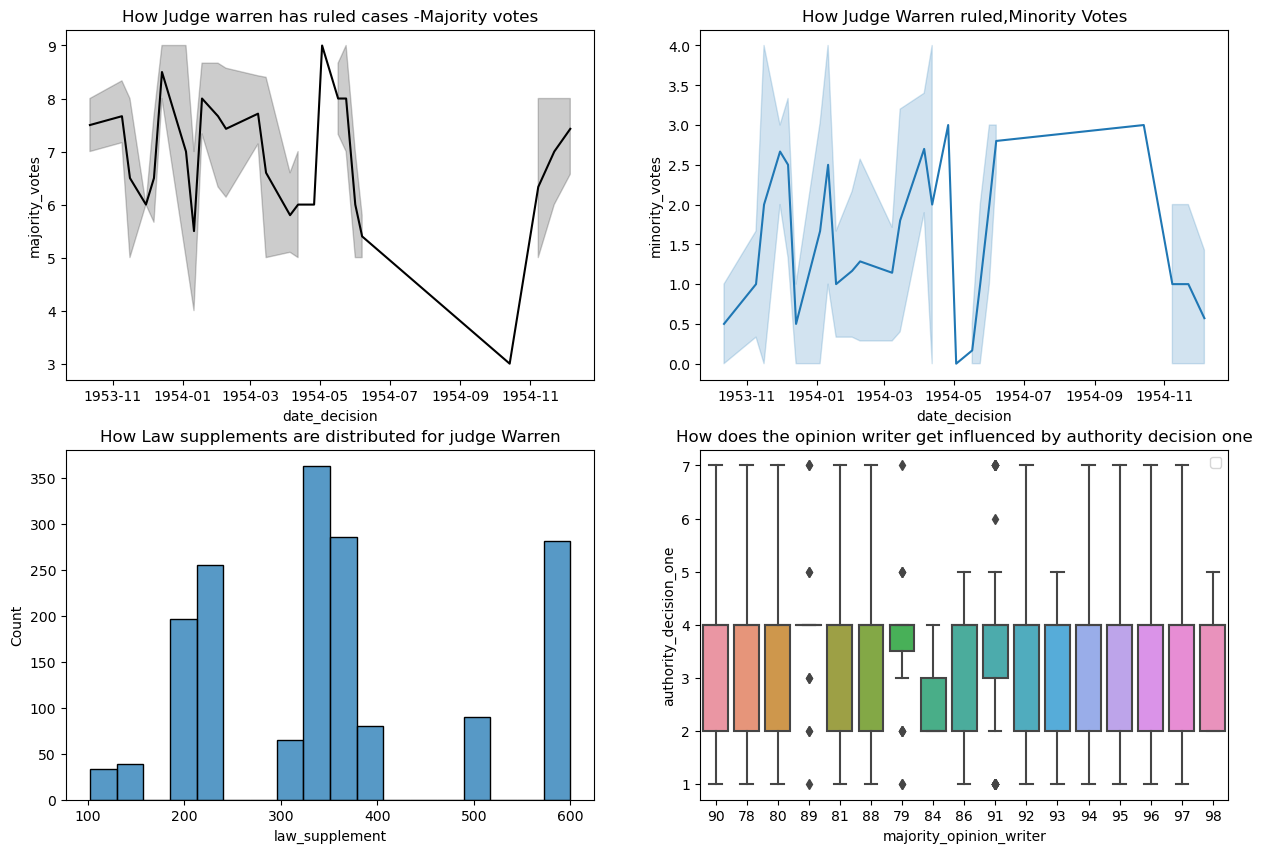

In [237]:
# The study of Judges 
#Judge Warren (-:
chief_justice = df[df['chief_justice' ]=='Warren']['majority_votes'].head(100)
year = df[df['chief_justice']=='Warren']['date_decision'].head(100)
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(x=year,y=chief_justice,color='black')
plt.title('How Judge warren has ruled cases -Majority votes')
plt.subplot(2,2,2)
sns.lineplot(x=df[df['chief_justice']=='Warren']['date_decision'].head(100),y=df[df['chief_justice' ]=='Warren']['minority_votes'].head(100))
plt.title('How Judge Warren ruled,Minority Votes')
plt.subplot(2,2,3)
sns.histplot(x=df[df['chief_justice']=='Warren']['law_supplement'])
plt.title('How Law supplements are distributed for judge Warren')
plt.subplot(2,2,4)
sns.boxplot(x=df[df['chief_justice']=='Warren']['majority_opinion_writer'],y=df[df['chief_justice']=='Warren']['authority_decision_one'])
plt.legend()
plt.title('How does the opinion writer get influenced by authority decision one')


Text(0.5, 1.0, 'How does the opinion writer get influenced by authority decision one in Burgers era')

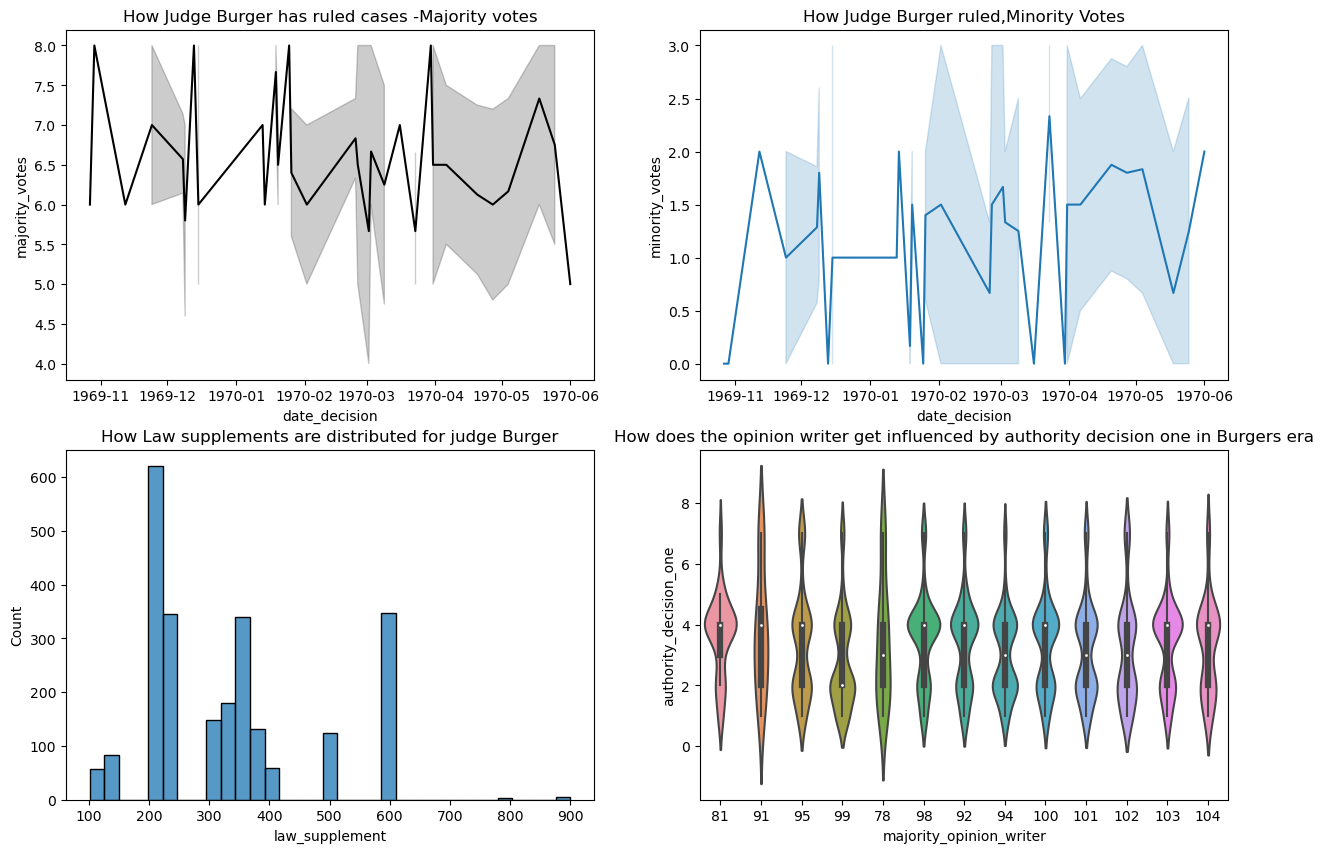

In [238]:
#Judge Burger (-:
chief_justice = df[df['chief_justice' ]=='Burger']['majority_votes'].head(100)
year = df[df['chief_justice']=='Burger']['date_decision'].head(100)
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(x=year,y=chief_justice,color='black')
plt.title('How Judge Burger has ruled cases -Majority votes')
plt.subplot(2,2,2)
sns.lineplot(x=df[df['chief_justice']=='Burger']['date_decision'].head(100),y=df[df['chief_justice' ]=='Burger']['minority_votes'].head(100))
plt.title('How Judge Burger ruled,Minority Votes')
plt.subplot(2,2,3)
sns.histplot(x=df[df['chief_justice']=='Burger']['law_supplement'])
plt.title('How Law supplements are distributed for judge Burger')
plt.subplot(2,2,4)
sns.violinplot(x=df[df['chief_justice']=='Burger']['majority_opinion_writer'],y=df[df['chief_justice']=='Burger']['authority_decision_one'])
plt.title('How does the opinion writer get influenced by authority decision one in Burgers era')

Text(0.5, 1.0, 'How does the opinion writer get influenced by authority decision one in Rehnquist era')

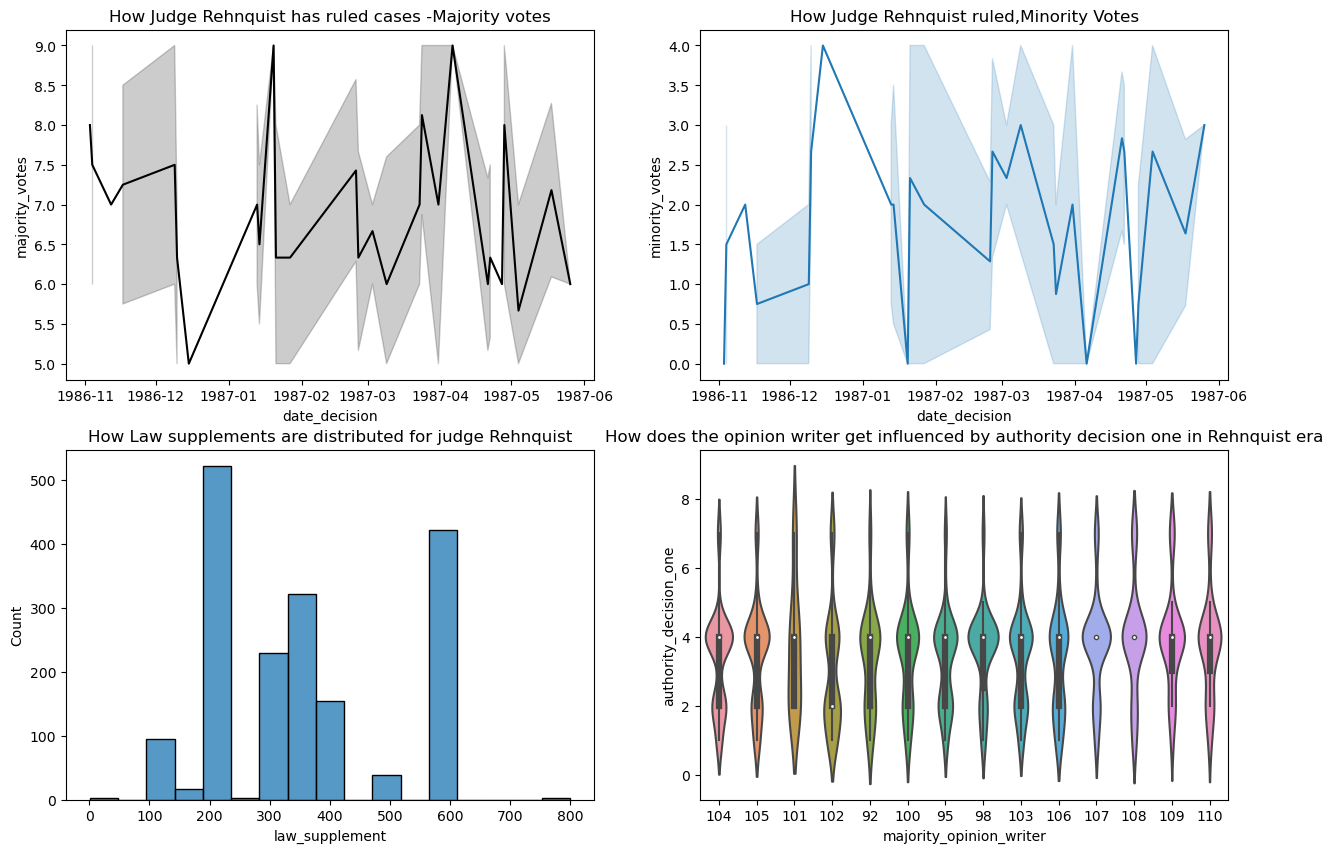

In [239]:
#Judge Rehnquist (-:
chief_justice = df[df['chief_justice' ]=='Rehnquist']['majority_votes'].head(100)
year = df[df['chief_justice']=='Rehnquist']['date_decision'].head(100)
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(x=year,y=chief_justice,color='black')
plt.title('How Judge Rehnquist has ruled cases -Majority votes')
plt.subplot(2,2,2)
sns.lineplot(x=df[df['chief_justice']=='Rehnquist']['date_decision'].head(100),y=df[df['chief_justice' ]=='Rehnquist']['minority_votes'].head(100))
plt.title('How Judge Rehnquist ruled,Minority Votes')
plt.subplot(2,2,3)
sns.histplot(x=df[df['chief_justice']=='Rehnquist']['law_supplement'])
plt.title('How Law supplements are distributed for judge Rehnquist')
plt.subplot(2,2,4)
sns.violinplot(x=df[df['chief_justice']=='Rehnquist']['majority_opinion_writer'],y=df[df['chief_justice']=='Rehnquist']['authority_decision_one'])
plt.title('How does the opinion writer get influenced by authority decision one in Rehnquist era')

Text(0.5, 1.0, 'How does the opinion writer get influenced by authority decision one in Rehnquist era')

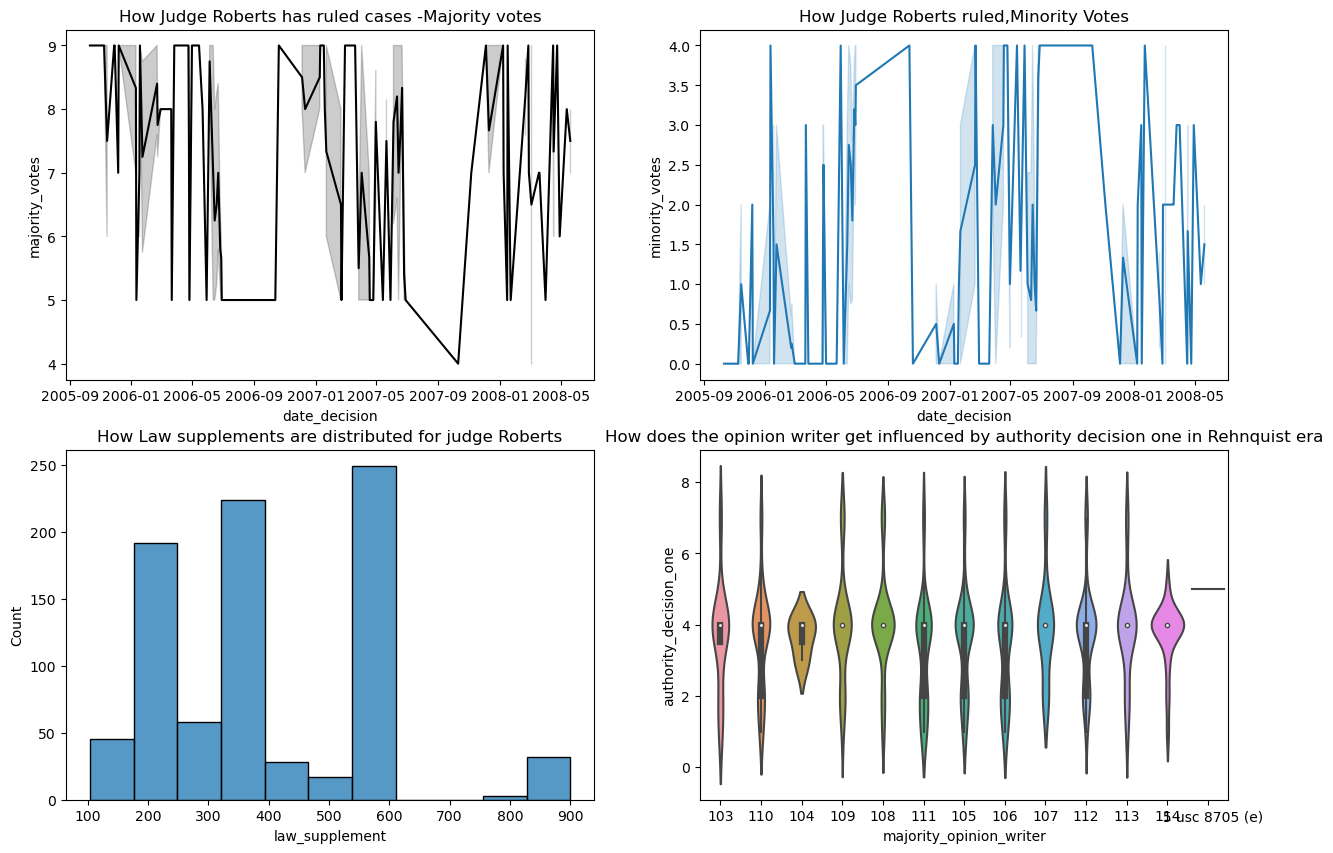

In [240]:
#Judge Roberts(-:
chief_justice = df[df['chief_justice' ]=='Roberts']['majority_votes'].head(200)
fig.suptitle('Judge Roberts')
year = df[df['chief_justice']=='Roberts']['date_decision'].head(200)
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(x=year,y=chief_justice,color='black')
plt.title('How Judge Roberts has ruled cases -Majority votes')
plt.subplot(2,2,2)
sns.lineplot(x=df[df['chief_justice']=='Roberts']['date_decision'].head(200),y=df[df['chief_justice' ]=='Roberts']['minority_votes'].head(200))
plt.title('How Judge Roberts ruled,Minority Votes')
plt.subplot(2,2,3)
sns.histplot(x=df[df['chief_justice']=='Roberts']['law_supplement'])
plt.title('How Law supplements are distributed for judge Roberts')
plt.subplot(2,2,4)
sns.violinplot(x=df[df['chief_justice']=='Roberts']['majority_opinion_writer'],y=df[df['chief_justice']=='Roberts']['authority_decision_one'])
plt.title('How does the opinion writer get influenced by authority decision one in Rehnquist era')

Text(0.5, 1.0, 'How does the opinion writer get influenced by authority decision one in Vinson era')

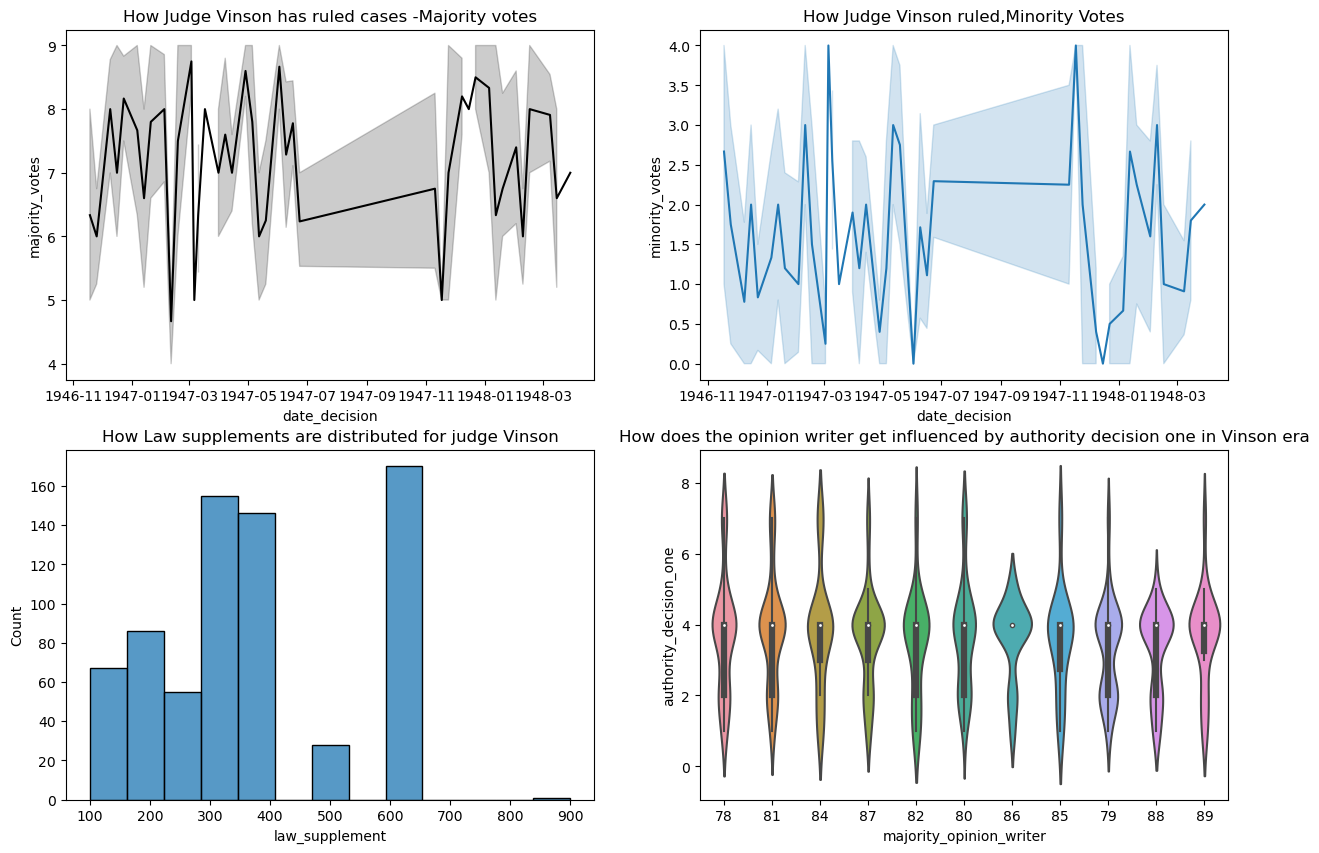

In [241]:
#Judge Vinson (-:
chief_justice = df[df['chief_justice' ]=='Vinson']['majority_votes'].head(200)
year = df[df['chief_justice']=='Vinson']['date_decision'].head(200)
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(x=year,y=chief_justice,color='black')
plt.title('How Judge Vinson has ruled cases -Majority votes')
plt.subplot(2,2,2)
sns.lineplot(x=df[df['chief_justice']=='Vinson']['date_decision'].head(200),y=df[df['chief_justice' ]=='Vinson']['minority_votes'].head(200))
plt.title('How Judge Vinson ruled,Minority Votes')
plt.subplot(2,2,3)
sns.histplot(x=df[df['chief_justice']=='Vinson']['law_supplement'])
plt.title('How Law supplements are distributed for judge Vinson')
plt.subplot(2,2,4)
sns.violinplot(x=df[df['chief_justice']=='Vinson']['majority_opinion_writer'],y=df[df['chief_justice']=='Vinson']['authority_decision_one'])
plt.title('How does the opinion writer get influenced by authority decision one in Vinson era')

In [242]:
most_common('chief_justice')

Burger       2807
Warren       2205
Rehnquist    2040
Roberts       873
Vinson        812
Name: chief_justice, dtype: int64

Text(0.5, 1.0, 'A pie chart showing Judges in numbers')

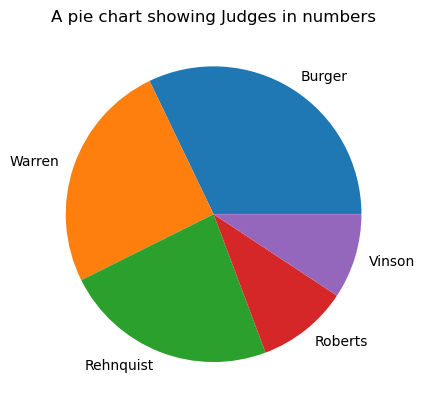

In [243]:
labels=('Burger','Warren','Rehnquist','Roberts','Vinson')
sizes =[2807,2205,2040,873,812]
plt.pie(sizes,labels=labels)
plt.title( 'A pie chart showing Judges in numbers') 

In [244]:
df.columns

Index(['case_id', 'docket_id', 'issues_id', 'vote_id', 'date_decision',
       'decision_type', 'us_citation', 'court_citation', 'led_citation',
       'lexis_citation', 'term', 'court', 'chief_justice', 'docket',
       'case_name', 'date_argument', 'date_reargument', 'petitioner',
       'petitioner_state', 'respondent', 'respondent_state', 'jurisdiction',
       'administrative_action', 'administrative_action_state',
       'district_court', 'case_origin', 'case_origin_state', 'case_source',
       'case_source_state', 'lower_court_disagreement', 'cert_reason',
       'lower_court_disposition', 'lower_disposition_direction',
       'declaration_unconstitutionality', 'case_disposition',
       'disposition_unusual', 'party_winning', 'precedent_alteration',
       'vote_unclear', 'issue', 'issue_area', 'decision_direction',
       'decision_direction_dissent', 'authority_decision_one',
       'authority_decision_two', 'law_type', 'law_supplement',
       'law_minor_supplement', 'major

In [245]:
most_common('us_citation') 

347 U.S. 909     3
399 U.S. 520     2
349 U.S. 901     2
346 U.S. 932     2
346 U.S. 906     2
415 U.S. 289     2
352 U.S. 1020    2
352 U.S. 1027    2
352 U.S. 862     2
348 U.S. 978     2
Name: us_citation, dtype: int64

In [246]:
unique_values('vote_id')

8737


In [247]:
df.shape

(8737, 53)

In [251]:
important_columns = correlation.columns
X=important_columns.drop(['decision_type'])
X

Index(['term', 'court', 'petitioner', 'petitioner_state', 'respondent',
       'respondent_state', 'jurisdiction', 'administrative_action',
       'administrative_action_state', 'district_court', 'case_origin',
       'case_origin_state', 'case_source', 'case_source_state',
       'lower_court_disagreement', 'cert_reason', 'lower_court_disposition',
       'lower_disposition_direction', 'declaration_unconstitutionality',
       'case_disposition', 'disposition_unusual', 'party_winning',
       'precedent_alteration', 'vote_unclear', 'issue', 'issue_area',
       'decision_direction', 'decision_direction_dissent',
       'authority_decision_one', 'authority_decision_two', 'law_type',
       'law_supplement', 'majority_opinion_assigner', 'split_vote',
       'majority_votes', 'minority_votes'],
      dtype='object')

In [252]:
df['decision_type'].value_counts()

1    6825
2     955
6     543
7     236
5     113
4      65
Name: decision_type, dtype: int64

In [253]:
features = ['term', 'court', 'petitioner', 'petitioner_state', 'respondent',
       'respondent_state', 'jurisdiction', 'administrative_action',
       'administrative_action_state', 'district_court', 'case_origin',
       'case_origin_state', 'case_source', 'case_source_state',
       'lower_court_disagreement', 'cert_reason', 'lower_court_disposition',
       'lower_disposition_direction', 'declaration_unconstitutionality',
       'case_disposition', 'disposition_unusual', 'party_winning',
       'precedent_alteration', 'vote_unclear', 'issue', 'issue_area',
       'decision_direction', 'decision_direction_dissent',
       'authority_decision_one', 'authority_decision_two', 'law_type',
       'law_supplement', 'majority_opinion_assigner', 'split_vote',
       'majority_votes', 'minority_votes']
X = df[features].astype('float32')
y = df['decision_type'].astype('float32')

In [254]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [255]:
y_train[:5]

670     1.0
5794    7.0
5469    1.0
801     2.0
2636    1.0
Name: decision_type, dtype: float32

In [258]:
from sklearn.linear_model import LogisticRegression
rfc = LogisticRegression()
rfc.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [257]:
np.any(np.isnan(X))

True